# Graham scan algorithm

Use the cell below for all python code needed to realise the Graham scan algorithm (including any auxiliary data structures and functions you might need). The `grahamscan()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

In [6]:
#def extendedgrahamscan(inputSet):
import math

def graham_scan(inputSet):
    stack = []
    bmp = find_bottom_point(inputSet)
    ordList = removeAngles(sort_in_polar_angles(inputSet))#doesn't include bottom point
    stack.append(bmp)
    stack.append(ordList[0])
    for x in range(1,len(ordList)):
        point = ordList[x]
        while (True):
            EndPoint = stack[-1]#top of the stack
            StartPoint = stack[-2]#required to form current vector
            presVec = get_vector(StartPoint, EndPoint)
            testVec = get_vector(StartPoint, point)#vector we're testing is to left or not
            cp = crossProduct(presVec,testVec)
            if check_cp(cp, stack, presVec, testVec, point):
                break
    return stack

def check_cp (cp, stack, presVec, testVec, point):
    if cp == 0:
        if(smallerMag(presVec,testVec) == presVec):
            stack.pop()
            stack.append(point)# we want the bigger one
            return True
        else:
            return True # we already have the bigger one
    elif cp > 0:
        stack.append(point)#push point in
        return True
    else:
        stack.pop()# remove point until we get a point to the left of the current vector
        return False

def find_bottom_point(points):
    bottom = points[0]
    for point in points:
        if point[1] < bottom[1]:
            bottom = point
    return bottom

def merge(array, left, right, mid):
    left_list = array[left:mid+1]
    right_list = array[mid+1: right+1]
    l = 0
    r = 0
    s = left
    while l < len(left_list) and r < len(right_list):
        if left_list[l][1] < right_list [r][1]:
            array[s] = left_list[l]
            l+=1
        else:
            array[s] = right_list[r]
            r +=1
        s+=1
    
    while l < len(left_list):
        array[s] = left_list[l]
        l+=1
        s+=1
    while r < len(right_list):
        array[s] = right_list[r]
        r+=1
        s+=1

def mergeSort(array, left, right):
    if left >= right:
        return
    
    mid = (left + right)//2
    mergeSort(array, left, mid)
    mergeSort(array, mid+1, right)
    merge(array, left, right, mid)
    return array


def calc_angle(point1, point2):
    vector = [point2[0]-point1[0], point2[1]-point1[1]]
    r = (vector[0]**2 + vector[1]**2)**0.5
    x = vector[0]
    angle = math.acos(x/r)
    return angle


def sort_in_polar_angles(points):
    list_of_points_angles = []
    point1 = find_bottom_point(points)
    #points.remove(point1)
    new_points = points.copy()
    new_points.remove(point1)
    for point in new_points:
        point2 = point
        angle = calc_angle(point1, point2)
        point_angle_pair = [point2, angle]
        list_of_points_angles.append(point_angle_pair)
    list_of_points_angles = mergeSort(list_of_points_angles,0,len(list_of_points_angles)-1)
    return list_of_points_angles


def removeAngles(list_points_angles):
    finalPoints = []
    for point in list_points_angles:
        finalPoints.append(point[0])
    return finalPoints

def get_vector(point1, point2):
    return [point2[0]-point1[0], point2[1]-point1[1]]

def crossProduct(vector1, vector2):
    return ((vector1[0]*vector2[1])-(vector2[0]*vector1[1]))

def smallerMag(vector1, vector2):
    mag1 = ((vector1[0])**2 + (vector1[1])**2)**0.5
    mag2 = ((vector2[0])**2 + (vector2[1])**2)**0.5
    if mag1 < mag2:
        return vector1
    else:
        return vector2


# extended (temporarily placing here for now!)
def get_edge_points(points):
    edge_points = []
    min_x = points[0]
    max_x = points[0]
    min_y = points[0]
    max_y = points[0]
    for point in points:
        if point[0] < min_x[0]:
            min_x = point
        if point[0] > max_x[0]:
            max_x = point
        if point[1] < min_y[1]:
            min_y = point
        if point[1] > max_y[1]:
            max_y = point

    edge_points.append(min_x)
    edge_points.append(max_y)
    edge_points.append(max_x)
    edge_points.append(min_y)
   
    
    return edge_points

def get_4_vectors(edge_points):
    vector_list = []
    vector1 = get_vector(edge_points[0], edge_points[1])
    vector_list.append(vector1)
    vector2 = get_vector(edge_points[1], edge_points[2])
    vector_list.append(vector2)
    vector3 = get_vector(edge_points[2], edge_points[3])
    vector_list.append(vector3)
    vector4 = get_vector(edge_points[3], edge_points[0])
    vector_list.append(vector4)
    return vector_list
  
def is_in_polygon(point, edge_points):
    vectors = get_4_vectors(edge_points)
    in_polygon = True
    for i in range(0,4):
        vector1 = vectors[i]
        vector2 = get_vector(edge_points[i], point)
        cp = crossProduct(vector1, vector2)
        if cp >=0:
            in_polygon = False
    return in_polygon

def reduce_points(points):
    edge_points = get_edge_points(points)
    new_points = points.copy()#we don't want to change the input list
    for point in new_points:
        if is_in_polygon(point, edge_points):
            new_points.remove(point)
    return new_points

def extended_graham(points):
  reduced = reduce_points(points)
  return graham_scan(reduced)

#    return outputSet


setx = [[3,1], [2,2], [3, 3], [4,4], [1,4], [1,1], [1, 5], [2, 4], [3, 5]]
print(graham_scan(setx))
print(extended_graham(setx))

[[3, 1], [4, 4], [3, 5], [1, 5], [1, 1]]
[[3, 1], [4, 4], [3, 5], [1, 5], [1, 1]]


Use the cell below for all python code needed to generate test data points (both random and those representing worst-case scenario).

In [4]:
import random

#code for random data generation
def randomPoints(n):
    inputSet = []
    for i in range(n):
        x = random.randint(0,32767)
        y = random.randint(0,32767)
        point = [x,y]
        inputSet.append(point)
    return inputSet


#code for worst case data generation



Use the cell below for all python code needed to test the `grahamscan()` function on the data generated above.

In [8]:
import timeit

#test code
import timeit
import time
#test code
def timeTaken(points):
    t0 = time.time()
    graham_scan(points)
    t1 = time.time()
    time_taken = (t1-t0)*100000
    #print(time_taken)
    return time_taken

def timeTaken2(points):
    t0 = time.time()
    extended_graham(points)
    t1 = time.time()
    time_taken = (t1-t0)*100000
    #print(time_taken)
    return time_taken

inputSet2 = randomPoints(5000)
print (timeTaken(inputSet2))
print (timeTaken2(inputSet2))



16785.645484924316
15801.143646240234


*Oprional*: Feel free to use the code below on small datasets (e.g., N = 10) to visually inspect whether the algorithm has been implemented correctly. The fragment below assumes both `inputSet` and `outputSet` to be lists of 2D points, with each point being a list of 2 elements (e.g., `[[x1,y1], [x2,y2], ..., [x_k,y_k]]`)

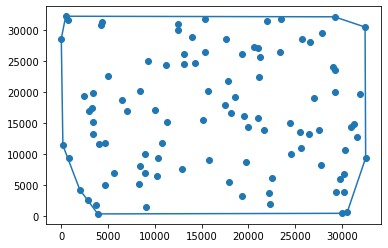

In [11]:
import matplotlib.pyplot as plt

inputSet = randomPoints(100)
outputSet = graham_scan(inputSet)

# inputSet and outputSet should have been defined above. 
# uncomment the next two lines only if you wish to test the plotting code before coding your algorithm

#inputSet = [[1,1], [2,2] , [3, 3], [4,4], [1,4], [3,1], [1, 5], [2, 4], [3, 5]]
#outputSet = [[1,1], [3,1] , [4, 4], [3,5], [1,5]]

plt.figure()

#first do a scatter plot of the inputSet
input_xs, input_ys = zip(*inputSet)
plt.scatter(input_xs, input_ys)

#then do a polygon plot of the computed covex hull
outputSet.append(outputSet[0]) #first create a 'closed loop' by adding the first point at the end of the list
output_xs, output_ys = zip(*outputSet) 
plt.plot(output_xs, output_ys) 

plt.show() 